In [36]:
import pandas as pd
data = pd.read_csv("/kaggle/input/remote-work-and-mental-health/Impact_of_Remote_Work_on_Mental_Health.csv")

In [37]:
len(data)

5000

In [38]:
cols = data.columns

In [39]:
cols

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [40]:
len(cols)

20

In [41]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Mental_Health_Condition    1196
Physical_Activity          1629
dtype: int64

In [42]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [43]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)

# Display rows with outliers
outlier_indices = data.index[outliers]
outlier_rows = data.loc[outlier_indices]
print("Outliers identified using IQR method:")
print(outlier_rows)

Outliers identified using IQR method:
Empty DataFrame
Columns: [Employee_ID, Age, Gender, Job_Role, Industry, Years_of_Experience, Work_Location, Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resources, Productivity_Change, Social_Isolation_Rating, Satisfaction_with_Remote_Work, Company_Support_for_Remote_Work, Physical_Activity, Sleep_Quality, Region]
Index: []


In [44]:
# Select only numeric columns for analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate max, min, and median for each numeric column
summary_stats = pd.DataFrame({
    'Max': data[numeric_columns].max(),
    'Min': data[numeric_columns].min(),
    'Median': data[numeric_columns].median()
})

# Display the summary statistics
print(summary_stats)

                                 Max  Min  Median
Age                               60   22    41.0
Years_of_Experience               35    1    18.0
Hours_Worked_Per_Week             60   20    40.0
Number_of_Virtual_Meetings        15    0     8.0
Work_Life_Balance_Rating           5    1     3.0
Social_Isolation_Rating            5    1     3.0
Company_Support_for_Remote_Work    5    1     3.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


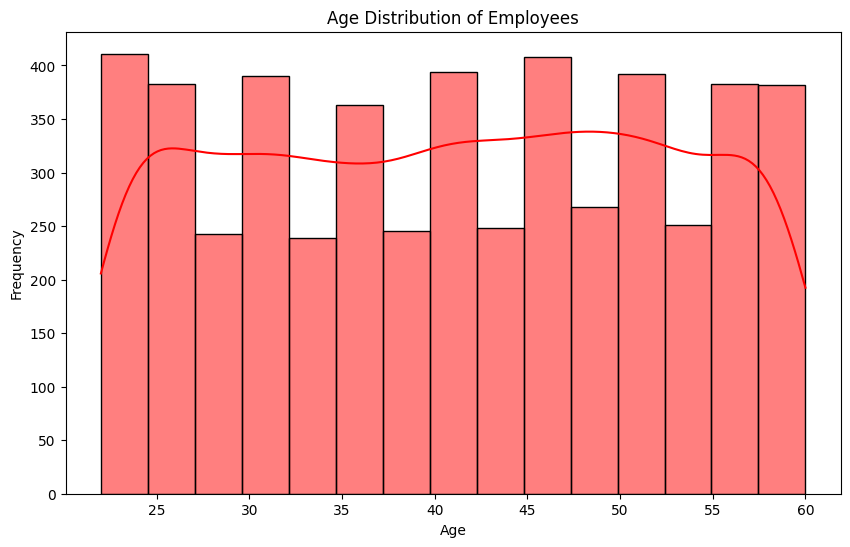

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=15, kde=True, color='red')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

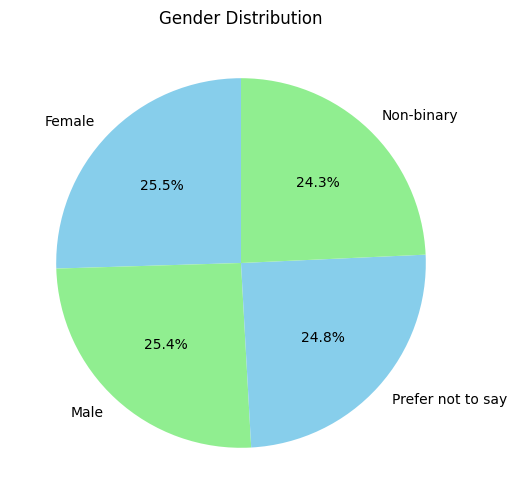

In [46]:
# Pie chart for gender distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()

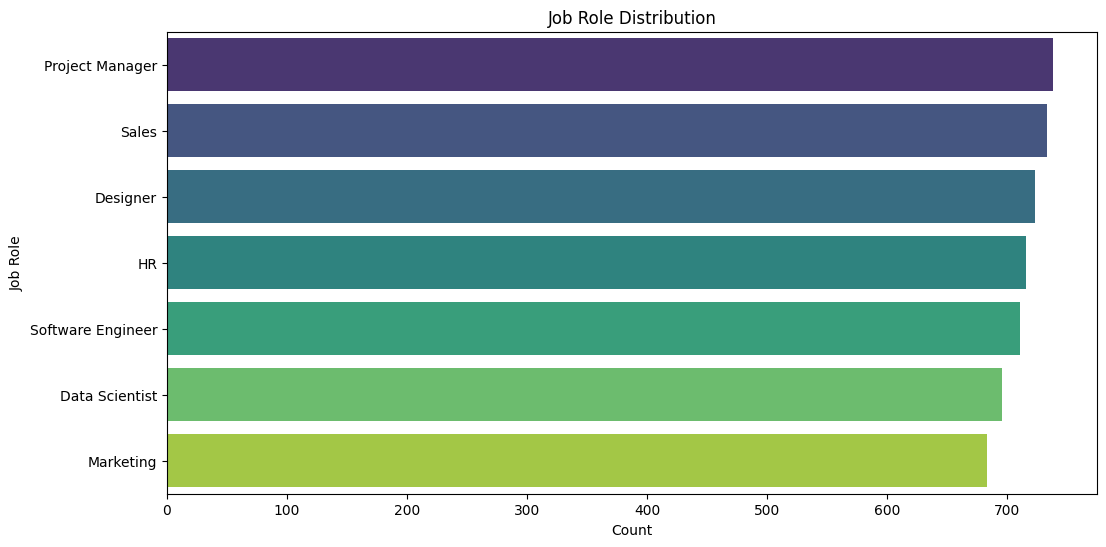

In [47]:
# Job role distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Job_Role', order=data['Job_Role'].value_counts().index, palette='viridis')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

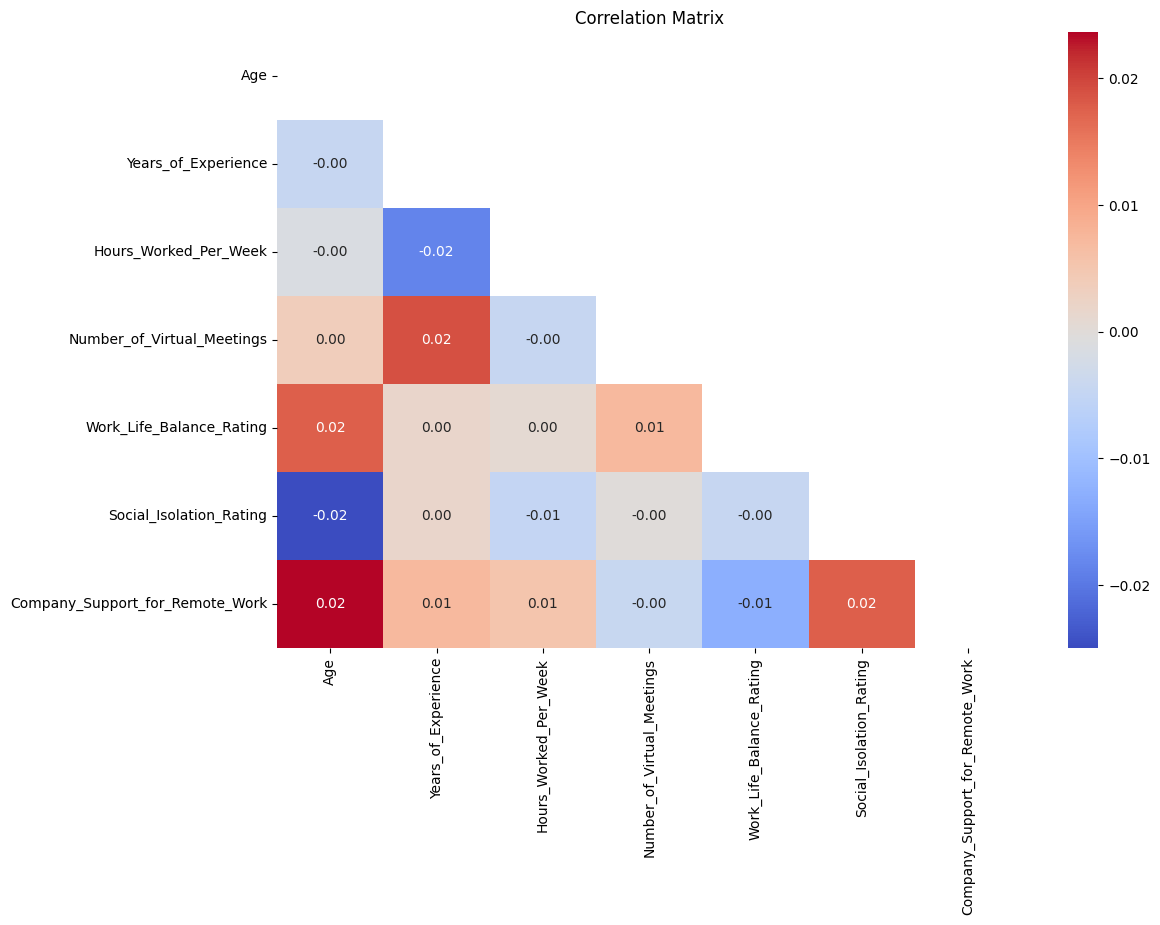

In [48]:
import numpy as np

# Correlation matrix heatmap with only numeric columns
plt.figure(figsize=(12, 8))
numeric_df = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()

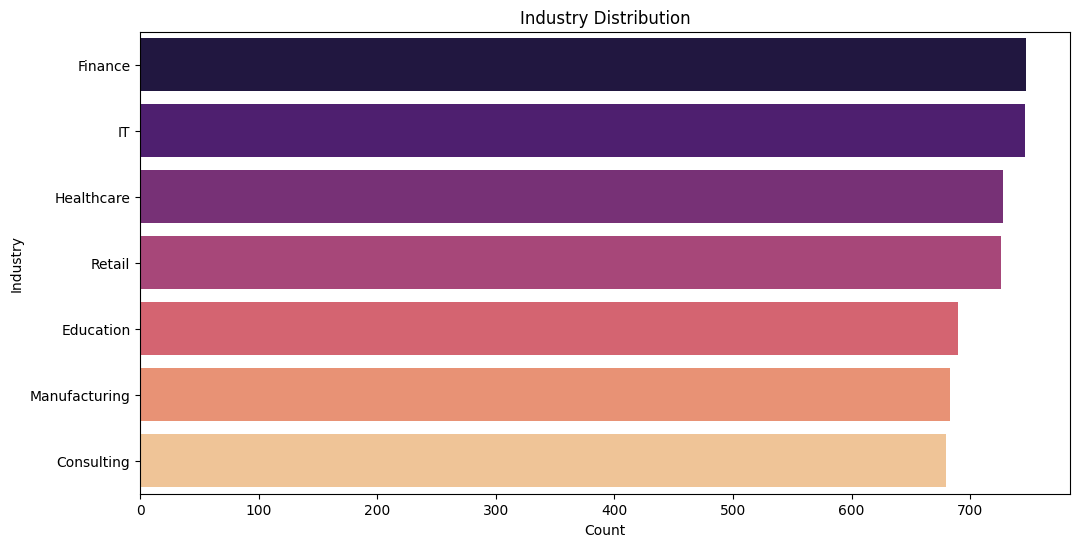

In [49]:
# Industry distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Industry', order=data['Industry'].value_counts().index, palette='magma')
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Handling missing values for numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handling missing values for categorical columns (filling with mode)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop(columns=['Mental_Health_Condition', 'Employee_ID'])
y = data['Mental_Health_Condition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_30/549783787.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create Decision Tree classifier object using Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state = 42)
entropy_tree.fit(X_train, y_train)
entropy_predictions = entropy_tree.predict(X_test)

# Evaluate Entropy Tree
print("Entropy Decision Tree Accuracy:", accuracy_score(y_test, entropy_predictions))
print(classification_report(y_test, entropy_predictions))

Entropy Decision Tree Accuracy: 0.357
              precision    recall  f1-score   support

           0       0.26      0.24      0.25       269
           1       0.48      0.49      0.49       479
           2       0.21      0.22      0.22       252

    accuracy                           0.36      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.35      0.36      0.36      1000



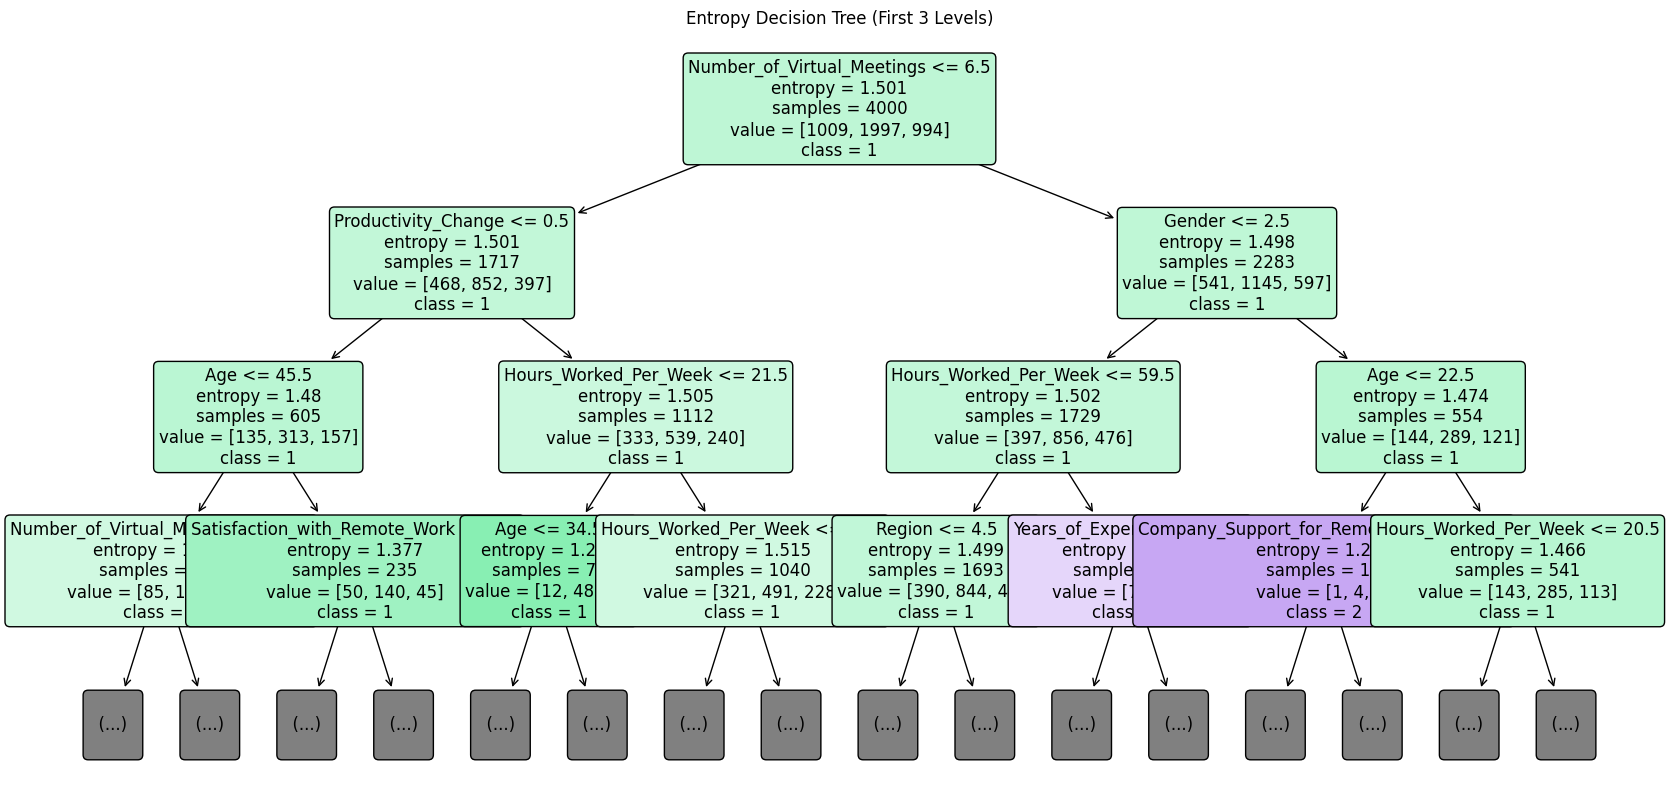

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Plot the Decision Tree, limiting the depth
plt.figure(figsize=(20, 10))  # Set the size of the plot
plot_tree(entropy_tree,  # Plot the tree
          feature_names=X.columns,  # Use feature names for clarity
          class_names=[str(cls) for cls in set(y)],  # Class names
          filled=True,  # Color the nodes
          rounded=True,  # Round the corners of the nodes
          fontsize=12,  # Font size
          max_depth=3)  # Limit the depth of the tree
plt.title("Entropy Decision Tree (First 3 Levels)")
plt.show()

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create Random Forest classifier object
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



Random Forest Accuracy: 0.457
              precision    recall  f1-score   support

           0       0.24      0.03      0.06       269
           1       0.47      0.92      0.62       479
           2       0.23      0.03      0.05       252

    accuracy                           0.46      1000
   macro avg       0.32      0.33      0.24      1000
weighted avg       0.35      0.46      0.33      1000



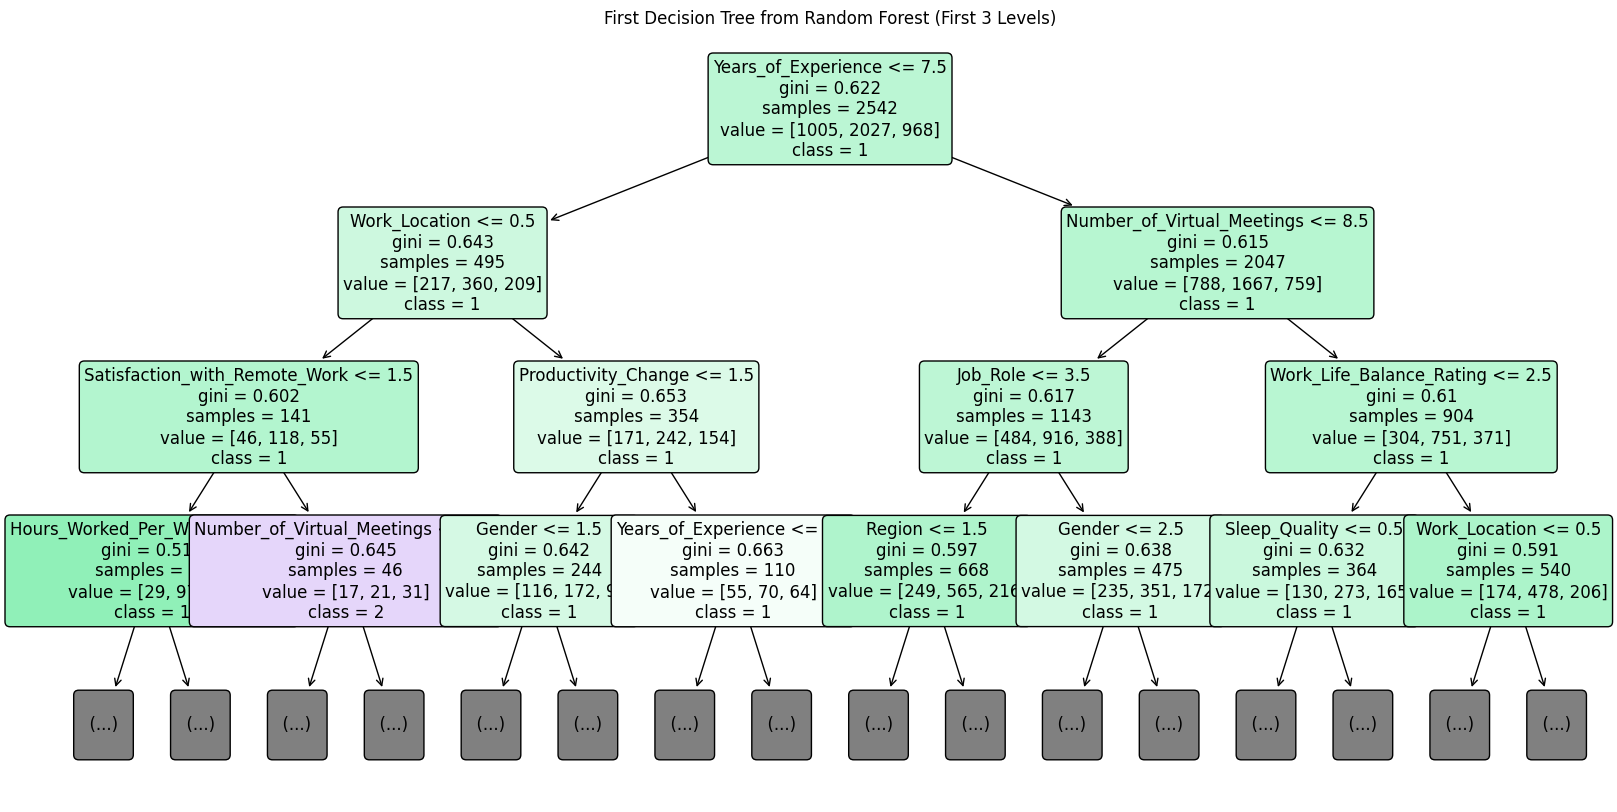

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the first tree in the Random Forest, limiting the depth
plt.figure(figsize=(20, 10))  # Set the size of the plot
plot_tree(rf_model.estimators_[0],  # Plot the first tree
          feature_names=X.columns,  # Use feature names for clarity
          class_names=[str(cls) for cls in set(y)],  # Class names
          filled=True,  # Color the nodes
          rounded=True,  # Round the corners of the nodes
          fontsize=12,  # Font size
          max_depth=3)  # Limit the depth of the tree
plt.title("First Decision Tree from Random Forest (First 3 Levels)")
plt.show()

Gradient Boosting Accuracy: 0.464
              precision    recall  f1-score   support

           0       0.19      0.01      0.02       269
           1       0.48      0.94      0.63       479
           2       0.24      0.04      0.06       252

    accuracy                           0.46      1000
   macro avg       0.30      0.33      0.24      1000
weighted avg       0.34      0.46      0.33      1000



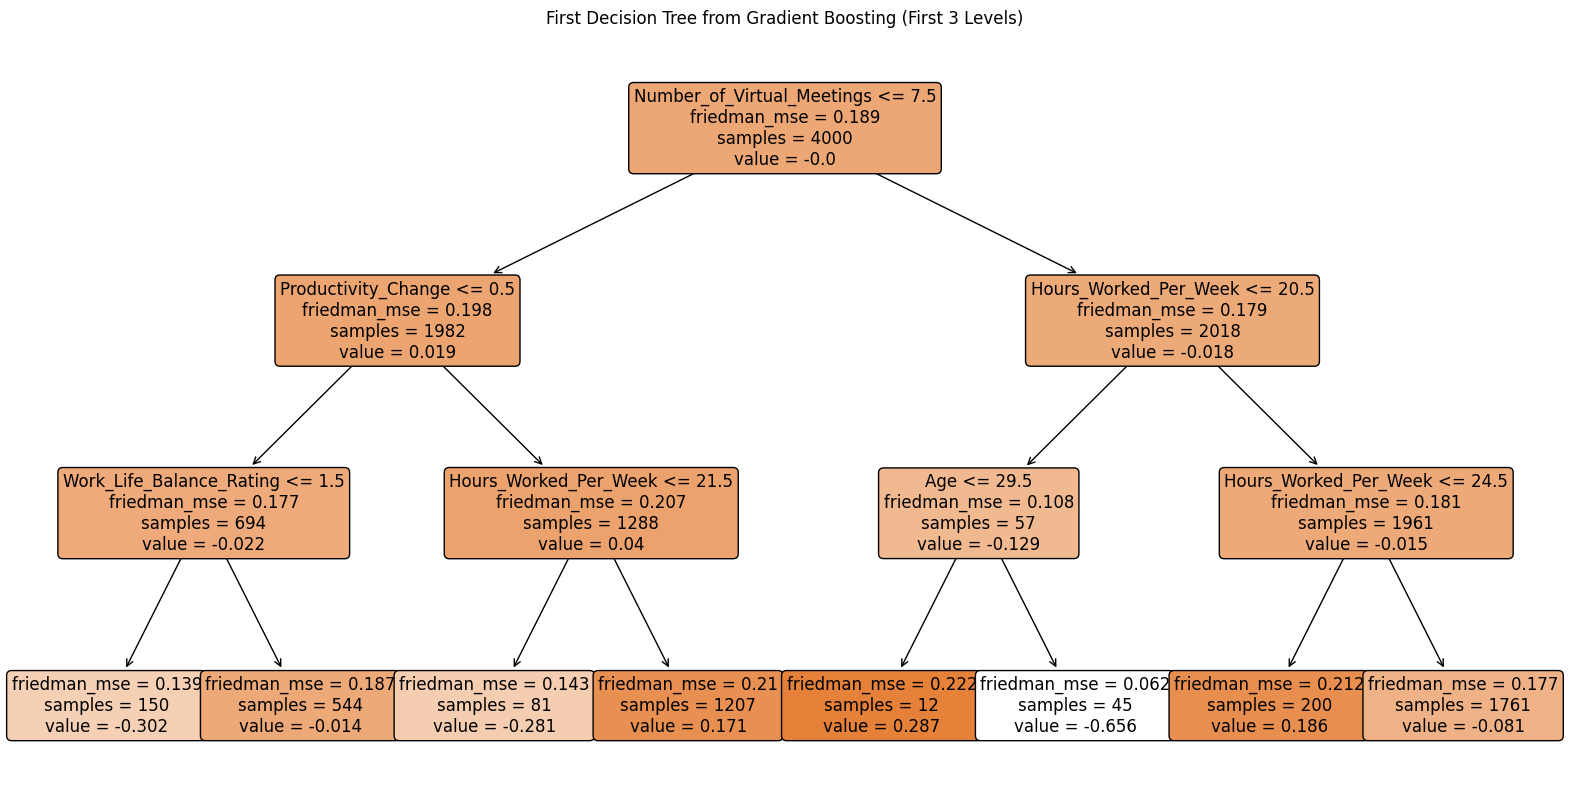

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assume 'data' is already defined and preprocessed
# Define features (X) and target (y)
X = data.drop(columns=['Mental_Health_Condition', 'Employee_ID'])  # Adjust column names as necessary
y = data['Mental_Health_Condition']  # Ensure this is the correct target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gradient Boosting classifier object
gb_model = GradientBoostingClassifier(n_estimators=100, random_state = 42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))

# Plot the first tree in Gradient Boosting
plt.figure(figsize=(20, 10))  # Set the size of the plot
plot_tree(gb_model.estimators_[0, 0],  # Plot the first tree
          feature_names=X.columns,  # Use feature names for clarity
          class_names=[str(cls) for cls in set(y)],  # Class names
          filled=True,  # Color the nodes
          rounded=True,  # Round the corners of the nodes
          fontsize=12,  # Font size
          max_depth=3)  # Limit the depth of the tree
plt.title("First Decision Tree from Gradient Boosting (First 3 Levels)")
plt.show()

Gini Decision Tree Accuracy: 0.351
              precision    recall  f1-score   support

           0       0.24      0.23      0.24       269
           1       0.47      0.46      0.47       479
           2       0.25      0.27      0.26       252

    accuracy                           0.35      1000
   macro avg       0.32      0.32      0.32      1000
weighted avg       0.35      0.35      0.35      1000



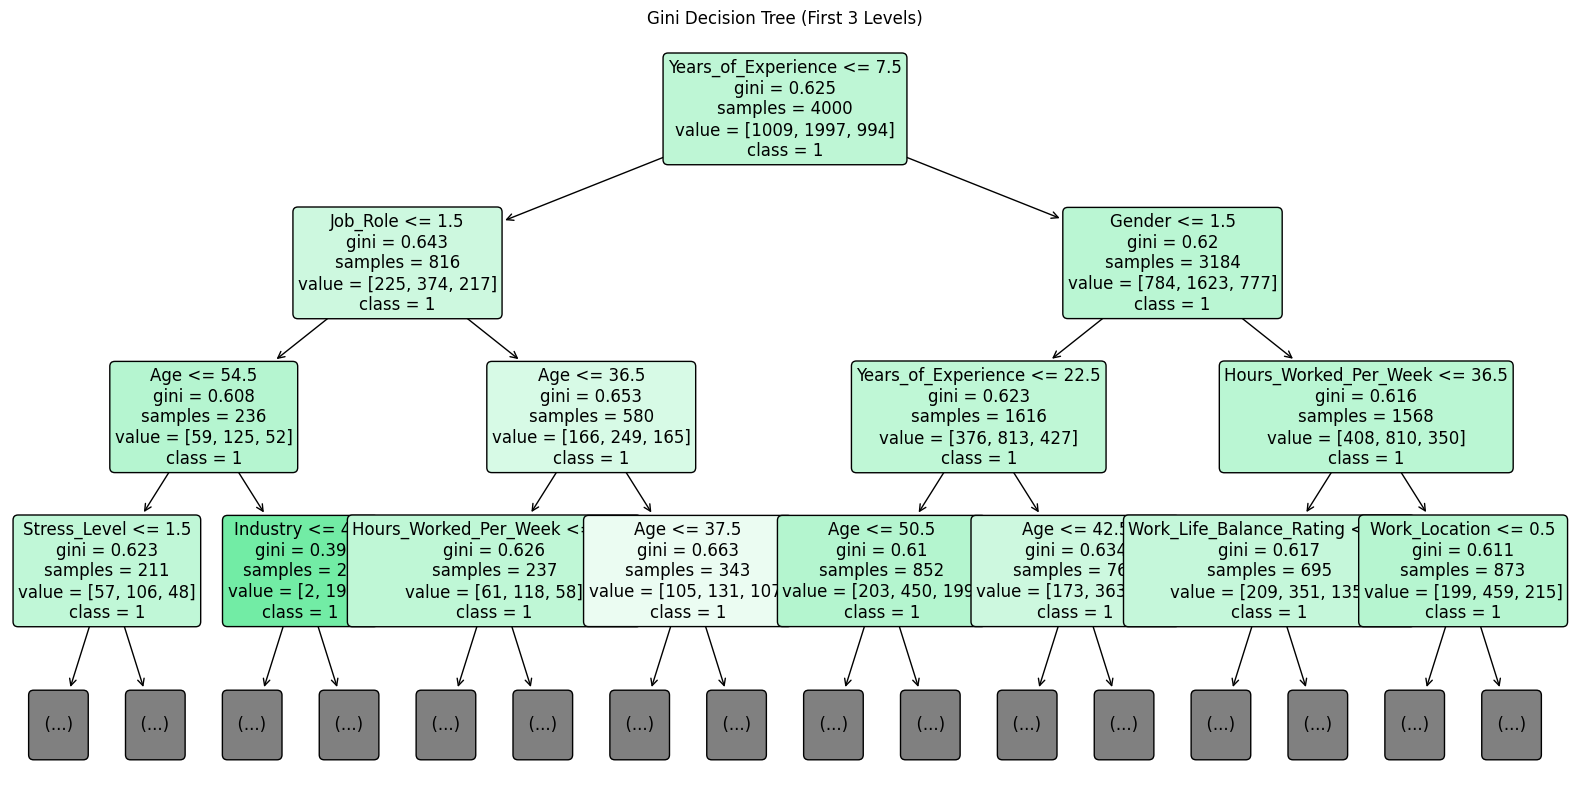

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assume 'data' is already defined
# Define features (X) and target (y)
X = data.drop(columns=['Mental_Health_Condition', 'Employee_ID'])  # Adjust column names as necessary
y = data['Mental_Health_Condition']  # Ensure this is the correct target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifier object using Gini index
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(X_train, y_train)

# Make predictions on the test set for Gini Tree
gini_predictions = gini_tree.predict(X_test)

# Evaluate Gini Tree
print("Gini Decision Tree Accuracy:", accuracy_score(y_test, gini_predictions))
print(classification_report(y_test, gini_predictions))


# Plot the Gini Decision Tree, limiting the depth
plt.figure(figsize=(20, 10))  # Set the size of the plot
plot_tree(gini_tree,  # Plot the Gini tree
          feature_names=X.columns,  # Use feature names for clarity
          class_names=[str(cls) for cls in set(y)],  # Class names
          filled=True,  # Color the nodes
          rounded=True,  # Round the corners of the nodes
          fontsize=12,  # Font size
          max_depth=3)  # Limit the depth of the tree for visualization
plt.title("Gini Decision Tree (First 3 Levels)")
plt.show()j

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Sample data (replace with your actual dataset)
# X = ... (features)
# y = ... (target variable)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree (Gini)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'Decision Tree (Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Store results
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Change here for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')        # Change here for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')                # Change here for multiclass
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                     Model  Accuracy  Precision  Recall  F1 Score
0     Decision Tree (Gini)     0.351   0.351784   0.351  0.351280
1  Decision Tree (Entropy)     0.357   0.353596   0.357  0.355099
2            Random Forest     0.457   0.350641   0.457  0.327540
3        Gradient Boosting     0.464   0.340360   0.464  0.325016
